In [45]:
import numpy as np 
try:
    import matplotlib
    matplotlib.rcParams['text.usetex'] = True
except:
    pass
import matplotlib.pyplot as plt
import dcs.localEquilibrium 
import dcs.vmec
from dcs.toroidalField import normalize
from dcs.toroidalField import derivatePol, derivateTor

$$ \frac{\partial}{\partial\vartheta} \frac{(\iota-\partial\lambda_\varphi)g_{\vartheta\varphi}+(1+\partial\lambda_\vartheta)g_{\varphi\varphi}}{\sqrt{g}} 
= \frac{\partial}{\partial\varphi} \frac{(\iota-\partial\lambda_\varphi)g_{\vartheta\vartheta}+(1+\partial\lambda_\vartheta)g_{\vartheta\varphi}}{\sqrt{g}} $$

令 $P = (\iota-\partial\lambda_\varphi)g_{\vartheta\varphi}+(1+\partial\lambda_\vartheta)g_{\varphi\varphi}$，$Q = (\iota-\partial\lambda_\varphi)g_{\vartheta\vartheta}+(1+\partial\lambda_\vartheta)g_{\vartheta\varphi}$

$$ \frac{\partial}{\partial\vartheta}\frac{P}{\sqrt{g}} = \frac{\partial}{\partial\varphi}\frac{Q}{\sqrt{g}} $$

$$ \sqrt{g}\left( \frac{\partial P}{\partial\vartheta}-\frac{\partial Q}{\partial\varphi} \right)
= P\frac{\partial\sqrt{g}}{\partial\vartheta} - Q\frac{\partial\sqrt{g}}{\partial\varphi} $$

In [53]:
# fileName = "../arbitrarySurface_VMECCases/wout_DIII-D.nc"
fileName = "../arbitrarySurface_VMECCases/wout_QAS.nc"
# fileName = "../arbitrarySurface_VMECCases/wout_heliotron.nc"

surfField_heliotron = dcs.localEquilibrium.ArbitrarySurfaceField.readVMEC(fileName) 

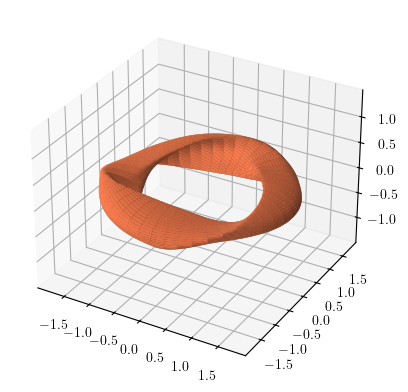

In [54]:
fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")
_ = surfField_heliotron.surf.plot_plt(fig=fig, ax=ax)

In [55]:
surfField_heliotron.solveJacobian()
surfField_heliotron.solveJacobianReciprocal()

Text(0.5, 0, '$\\vartheta$')

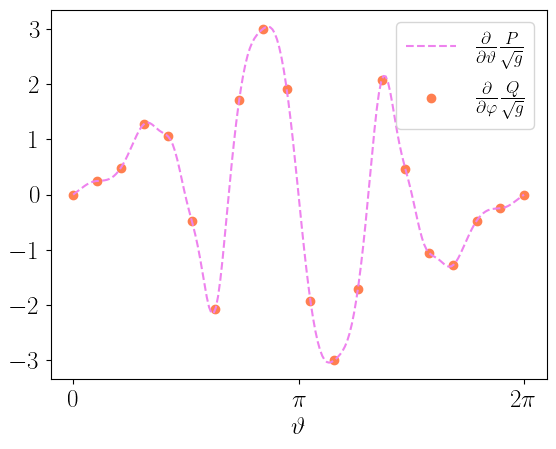

In [56]:
fig, ax = plt.subplots()
# zetaValue = np.pi/6
zetaValue = 0
ax.plot(
    np.linspace(0, 2*np.pi, 200), 
    derivatePol(surfField_heliotron.P*surfField_heliotron.JacobianReciprocal).getValue(np.linspace(0, 2*np.pi, 200), np.ones(200)*zetaValue).flatten(), 
    label = r"$\frac{\partial}{\partial\vartheta}\frac{P}{\sqrt{g}}$", 
    ls = "--",
    color = "violet"
)
ax.scatter(
    np.linspace(0, 2*np.pi, 20),
    derivateTor(surfField_heliotron.Q*surfField_heliotron.JacobianReciprocal).getValue(np.linspace(0,2*np.pi,20), np.ones(20)*zetaValue).flatten(),
    label = r"$\frac{\partial}{\partial\varphi}\frac{Q}{\sqrt{g}}$",
    color = "coral"
)
ax.legend(fontsize=18)
xValues = np.linspace(0, 2*np.pi, 3)
ax.set_xticks(xValues)
ax.set_xticklabels(["$0$", "$\pi$", "$2\pi$"], fontsize=18)
plt.yticks(fontsize=18)
ax.set_xlabel(r"$\vartheta$", fontsize=18)

Text(0.5, 0, '$\\vartheta$')

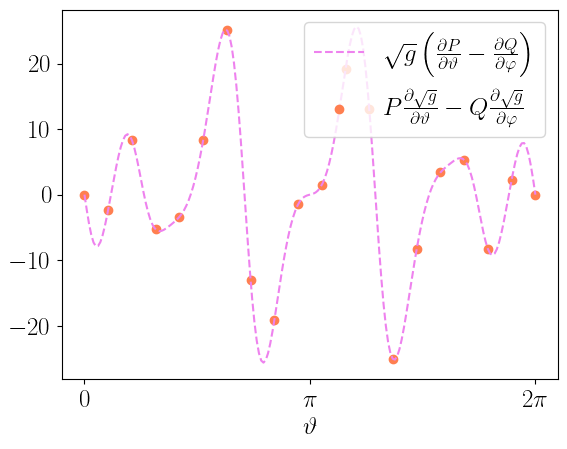

In [57]:
fig, ax = plt.subplots()
# zetaValue = np.pi/6
zetaValue = 0
ax.plot(
    np.linspace(0, 2*np.pi, 200), 
    (surfField_heliotron.Jacobian*(derivatePol(surfField_heliotron.P)-derivateTor(surfField_heliotron.Q))).getValue(np.linspace(0, 2*np.pi, 200), np.ones(200)*zetaValue).flatten(), 
    label = r"$\sqrt{g}\left( \frac{\partial P}{\partial\vartheta}-\frac{\partial Q}{\partial\varphi} \right)$", 
    ls = "--",
    color = "violet"
)
ax.scatter(
    np.linspace(0, 2*np.pi, 20),
    (surfField_heliotron.P*derivatePol(surfField_heliotron.Jacobian)-surfField_heliotron.Q*derivateTor(surfField_heliotron.Jacobian)).getValue(np.linspace(0,2*np.pi,20), np.ones(20)*zetaValue).flatten(),
    label = r"$P\frac{\partial\sqrt{g}}{\partial\vartheta} - Q\frac{\partial\sqrt{g}}{\partial\varphi}$",
    color = "coral"
)
ax.legend(fontsize=18)
xValues = np.linspace(0, 2*np.pi, 3)
ax.set_xticks(xValues)
ax.set_xticklabels(["$0$", "$\pi$", "$2\pi$"], fontsize=18)
plt.yticks(fontsize=18)
ax.set_xlabel(r"$\vartheta$", fontsize=18)

In [58]:
vmeclib = dcs.vmec.VMECOut(fileName)
vmecJacobian = normalize(vmeclib.getJacobian())

Text(0.5, 0, '$\\vartheta$')

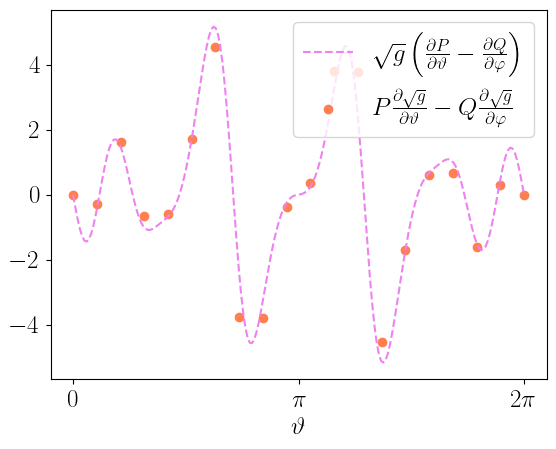

In [59]:
fig, ax = plt.subplots()
# zetaValue = np.pi/6
zetaValue = 0
ax.plot(
    np.linspace(0, 2*np.pi, 200), 
    (vmecJacobian*(derivatePol(surfField_heliotron.P)-derivateTor(surfField_heliotron.Q))).getValue(np.linspace(0, 2*np.pi, 200), np.ones(200)*zetaValue).flatten(), 
    label = r"$\sqrt{g}\left( \frac{\partial P}{\partial\vartheta}-\frac{\partial Q}{\partial\varphi} \right)$", 
    ls = "--",
    color = "violet"
)
ax.scatter(
    np.linspace(0, 2*np.pi, 20),
    (surfField_heliotron.P*derivatePol(vmecJacobian)-surfField_heliotron.Q*derivateTor(vmecJacobian)).getValue(np.linspace(0,2*np.pi,20), np.ones(20)*zetaValue).flatten(),
    label = r"$P\frac{\partial\sqrt{g}}{\partial\vartheta} - Q\frac{\partial\sqrt{g}}{\partial\varphi}$",
    color = "coral"
)
ax.legend(fontsize=18)
xValues = np.linspace(0, 2*np.pi, 3)
ax.set_xticks(xValues)
ax.set_xticklabels(["$0$", "$\pi$", "$2\pi$"], fontsize=18)
plt.yticks(fontsize=18)
ax.set_xlabel(r"$\vartheta$", fontsize=18)